Actividad Semanal -- 4

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

Ciencia y analítica de Datos

Profesor: Dr. Jobish Vallikavungal Devassia  

10 Octubre 2022

	Vamos a reutilizar el codigo de la sesion pasada, pues en dicho ejercicio hicimos la conexion a la fuente de datos, y eliminamos aquellos registros que podrian afectar nuestro calculo. A su vez, le dimos algo de formato.






In [249]:
import pandas as pd
import numpy as np

In [250]:
#df contiene nuestro dataframe original
df = pd.read_csv('default of credit card clients.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Verificar si existen datos vacios:

In [251]:
df.isnull().values.any()

True

In [252]:
#Ejemplo de como se ven estos renglones con datos nulos en el dataframe (ID 19, columnas X12,....X17)
df.loc[18:22 , 'X10':'X19']

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
ID,,,,,,,,,,
18,-1.0,-1.0,253286.0,246536.0,194663.0,70074.0,5856.0,195599.0,10358.0,10000.0
19,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
20,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,-1.0,38358.0,27688.0,24489.0,20616.0,11802.0,930.0,3000.0,1537.0
22,-1.0,-1.0,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0


Aqui se observa, que el problema de datos nulos existe en todas las columnas

In [253]:
#Verificamos cuales columnas son aquellas que contienen renglones vacios
df.isnull().any()
#df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Como primer paso de limpieza del dataframe, vamos a eliminar las 2 columnas que no se consideran relevantes para el estudio:

    X2: Gender (1 = male; 2 = female)
    X4: Marital status (1 = married; 2 = single; 3 = others)

In [254]:
#Este dataframe, ya no contiene las columnas irrelevantes
df_without_X2_X4 = df.drop(['X2', 'X4',], axis = 1)
df_without_X2_X4.head()

,X1,X3,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Vamos a renombrar las columnas a sus nombres explicados en el .txt, para entender mejor que numero estamos leyendo durante las siguientes fases

In [255]:
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X1":"Amount of the given credit"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X3":"Education"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X5":"Age"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X6":"Repayment September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X7":"Repayment August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X8":"Repayment July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X9":"Repayment June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X10":"Repayment May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X11":"Repayment April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X12":"Bill September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X13":"Bill August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X14":"Bill July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X15":"Bill June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X16":"Bill May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X17":"Bill April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X18":"amount paid  September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X19":"amount paid  August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X20":"amount paid  July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X21":"amount paid  June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X22":"amount paid  May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X23":"amount paid  April, 2005"})
df_without_X2_X4

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005","Bill August, 2005","Bill July, 2005","Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Seleccionando la mejor técnicas para manejar los datos faltantes

Como segundo paso de limpieza, vamos a eliminar renglones con datos vacios, como el ejemplo arriba mostrado donde el ID 19, no contenia datos en las columnas X12-X17.
Una vez que eliminemos esos renglones, veremos que tanto se reduce nuestro dataframe, para asi tomar una decision de que técnica para manejo de datos faltantes utilizaremos.

In [256]:
#Dropping rows with NaN values on some column (at least 1)
df_no_empty_rows = df_without_X2_X4.dropna()
df_no_empty_rows

#OPCIONAL En caso de querer definir un threshold
#df_no_empty_rows_with_threshold.dropna(thresh=4, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
#df_no_empty_rows_with_threshold # in case of column  add   axis=1 

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005","Bill August, 2005","Bill July, 2005","Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [257]:
#We see that instead of 3000 rows (original dataframe) we only have now 29,958 rows on this new dataframe
#Este dataframe elimina el renglon completo si es que alguna de las variables (X) es nula
# Solamente 42 de 3000 renglones (1.4%) se pierden al utilizar la técnica de Eliminación por lista.
df_no_empty_rows.shape


(29958, 22)

# Este sera nuestro dataframe para el ejercicio de la Semana 4:

In [258]:
df_eliminacion_por_lista = df_no_empty_rows
#df_eliminacion_por_lista.index.name = None
df_eliminacion_por_lista

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005","Bill August, 2005","Bill July, 2005","Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


!!!!!!!!!!!!!!!!!!!!!!!!!! Primero que nada, debemos de normalizar todos nuestros datos de variables INDEPENDIENTES  !!!!!!!!!!!!!!!!!!!!!!!!!!

In [259]:
# Using Sklearn & MinMax Scalar.
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_normalized = df_eliminacion_por_lista.copy()

#La variable dependiente no se debe de considerar en el dataset de PCA
df_normalized.drop(columns='Y',inplace=True)

df_normalized.iloc[:,0:] = scaler.fit_transform(df_normalized.iloc[:,0:].to_numpy())
df_normalized

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005","Bill August, 2005","Bill July, 2005","Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005"
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.137363,0.185849,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,-1.486513,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
2,-0.366561,0.185849,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,1.993916,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
3,-0.597802,0.185849,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
4,-0.906122,0.185849,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
5,-0.906122,0.185849,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,0.253701,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404240,1.450938,0.381647,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,1.869050,2.016773,2.325211,0.694875,-0.149477,-0.384512,0.171131,0.610450,-0.012796,-0.113733,0.012988,-0.237269
29997,-0.135321,1.450938,0.815761,-0.874468,-0.723367,-0.696680,-0.666630,0.235635,0.253701,-0.672765,-0.665250,-0.627383,-0.532915,-0.577704,-0.652714,-0.231017,-0.104084,0.213973,-0.299878,-0.314124,-0.293485
29998,-1.060283,0.185849,0.164590,3.574048,2.617900,1.811669,-0.666630,0.235635,0.253701,-0.647220,-0.643793,-0.638106,-0.348043,-0.324651,-0.327833,-0.341890,-0.257018,0.952008,-0.040181,-0.183279,-0.119217


# Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [260]:
df_normalized.shape

(29958, 21)

For each clientID, the data include 21 numerical variables, and we are interested in reducing this dimension.

In [261]:
import numpy as np
from sklearn.decomposition import PCA

pcs = PCA()
pcs.fit(df_normalized)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df = pcsSummary_df.round(4)
pd.set_option('display.max_columns', None)
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Standard deviation,2.5576,2.0222,1.2300,1.0823,0.9667,0.9426,0.9386,0.9289,0.8842,0.8560,0.8253,0.7276,0.6356,0.5097,0.4997,0.4346,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.3115,0.1947,0.0720,0.0558,0.0445,0.0423,0.0420,0.0411,0.0372,0.0349,0.0324,0.0252,0.0192,0.0124,0.0119,0.0090,0.0063,0.0033,0.0019,0.0012,0.0011
Cumulative proportion,0.3115,0.5062,0.5782,0.6340,0.6785,0.7208,0.7628,0.8039,0.8411,0.8760,0.9084,0.9336,0.9529,0.9652,0.9771,0.9861,0.9924,0.9957,0.9977,0.9989,1.0000


In [262]:
#To display how much components do we need to explain more than 90% of variance

#12 Principal components are needed
pcsSummary_df.iloc[2,10]

0.9084

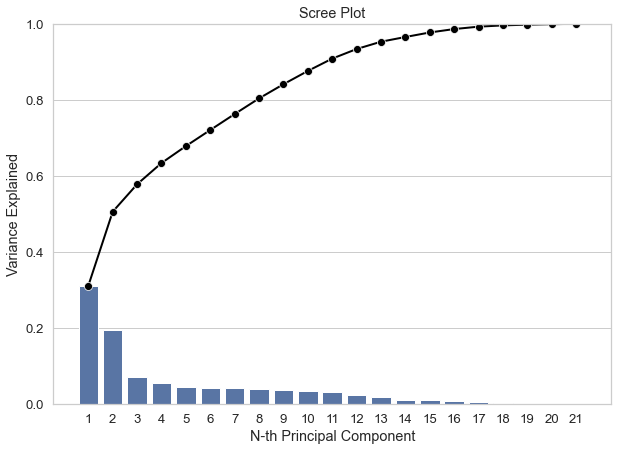

In [263]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


CONCLUSION:
Necesitamos al menos 11 componentes para explicar mas del 90% de la varianza de la coleccion de datos.

# Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [264]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df_normalized.columns
                                )
pcsComponents_df.iloc[:,:11].head()
#pcsComponents_df.sort_values(by='PC2', inplace=False, ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Amount of the given credit,0.068636,0.315917,0.060436,-0.067298,-0.300574,0.030396,-0.251371,0.253456,-0.028646,0.018766,-0.055128
Education,0.019040,-0.094310,-0.098642,0.703672,0.198262,-0.058654,0.301159,-0.400090,0.084332,0.001076,-0.193004
Age,0.013514,0.061856,-0.069711,0.690375,-0.296199,0.096461,-0.340628,0.430506,-0.081541,-0.003835,0.115241
"Repayment September, 2005",0.161013,-0.298911,-0.001603,0.006478,-0.088587,0.003103,0.032087,-0.057255,0.016681,0.037255,0.633637
"Repayment August, 2005",0.193972,-0.335543,0.047360,0.004498,-0.109794,-0.000190,0.022566,-0.051078,0.015170,0.023471,0.382250


Ahora debemos de buscar la magnitud y direccion de las variables originales, es decir cual influye mas y cual influye menos, en cada uno de los componentes principales

In [265]:
PC1 = pcsComponents_df['PC1'].abs().idxmax()                  
print('El valor original mas relevante para PC1 es: ', PC1, ", con un peso de: ", pcsComponents_df.abs().loc[PC1,['PC1']].values)
PC2 = pcsComponents_df['PC2'].abs().idxmax()                  
print('El valor original mas relevante para PC2 es: ', PC2, ", con un peso de: ", pcsComponents_df.abs().loc[PC2,['PC2']].values)
PC3 = pcsComponents_df['PC3'].abs().idxmax()                  
print('El valor original mas relevante para PC3 es: ', PC3, ", con un peso de: ", pcsComponents_df.abs().loc[PC3,['PC3']].values)
PC4 = pcsComponents_df['PC4'].abs().idxmax()                  
print('El valor original mas relevante para PC4 es: ', PC4, ", con un peso de: ", pcsComponents_df.abs().loc[PC4,['PC4']].values)
PC5 = pcsComponents_df['PC5'].abs().idxmax()                  
print('El valor original mas relevante para PC5 es: ', PC5, ", con un peso de: ", pcsComponents_df.abs().loc[PC5,['PC5']].values)
PC6 = pcsComponents_df['PC6'].abs().idxmax()                  
print('El valor original mas relevante para PC6 es: ', PC6, ", con un peso de: ", pcsComponents_df.abs().loc[PC6,['PC6']].values)
PC7 = pcsComponents_df['PC7'].abs().idxmax()                  
print('El valor original mas relevante para PC7 es: ', PC7, ", con un peso de: ", pcsComponents_df.abs().loc[PC7,['PC7']].values)
PC8 = pcsComponents_df['PC8'].abs().idxmax()                  
print('El valor original mas relevante para PC8 es: ', PC8, ", con un peso de: ", pcsComponents_df.abs().loc[PC8,['PC8']].values)
PC9 = pcsComponents_df['PC9'].abs().idxmax()                  
print('El valor original mas relevante para PC9 es: ', PC9, ", con un peso de: ", pcsComponents_df.abs().loc[PC9,['PC9']].values)
PC10 = pcsComponents_df['PC10'].abs().idxmax()                  
print('El valor original mas relevante para PC10 es: ', PC10, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC10']].values)
PC11 = pcsComponents_df['PC11'].abs().idxmax()                  
print('El valor original mas relevante para PC11 es: ', PC11, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC11']].values)


El valor original mas relevante para PC1 es:  Bill June, 2005 , con un peso de:  [0.35404466]
El valor original mas relevante para PC2 es:  Repayment June, 2005 , con un peso de:  [0.34520086]
El valor original mas relevante para PC3 es:  amount paid  August, 2005 , con un peso de:  [0.42994087]
El valor original mas relevante para PC4 es:  Education , con un peso de:  [0.70367197]
El valor original mas relevante para PC5 es:  amount paid  May, 2005 , con un peso de:  [0.56117246]
El valor original mas relevante para PC6 es:  amount paid  June, 2005 , con un peso de:  [0.6659325]
El valor original mas relevante para PC7 es:  amount paid  May, 2005 , con un peso de:  [0.70213931]
El valor original mas relevante para PC8 es:  amount paid  April, 2005 , con un peso de:  [0.51483408]
El valor original mas relevante para PC9 es:  amount paid  July, 2005 , con un peso de:  [0.78604804]
El valor original mas relevante para PC10 es:  amount paid  September, 2005 , con un peso de:  [0.72908721]

In [266]:
PC1 = pcsComponents_df['PC1'].abs().idxmin()                  
print('El valor original menos relevante para PC1 es: ', PC1, ", con un peso de: ", pcsComponents_df.abs().loc[PC1,['PC1']].values)
PC2 = pcsComponents_df['PC2'].abs().idxmin()                  
print('El valor original menos relevante para PC2 es: ', PC2, ", con un peso de: ", pcsComponents_df.abs().loc[PC2,['PC2']].values)
PC3 = pcsComponents_df['PC3'].abs().idxmin()                  
print('El valor original menos relevante para PC3 es: ', PC3, ", con un peso de: ", pcsComponents_df.abs().loc[PC3,['PC3']].values)
PC4 = pcsComponents_df['PC4'].abs().idxmin()                  
print('El valor original menos relevante para PC4 es: ', PC4, ", con un peso de: ", pcsComponents_df.abs().loc[PC4,['PC4']].values)
PC5 = pcsComponents_df['PC5'].abs().idxmin()                  
print('El valor original menos relevante para PC5 es: ', PC5, ", con un peso de: ", pcsComponents_df.abs().loc[PC5,['PC5']].values)
PC6 = pcsComponents_df['PC6'].abs().idxmin()                  
print('El valor original menos relevante para PC6 es: ', PC6, ", con un peso de: ", pcsComponents_df.abs().loc[PC6,['PC6']].values)
PC7 = pcsComponents_df['PC7'].abs().idxmin()                  
print('El valor original menos relevante para PC7 es: ', PC7, ", con un peso de: ", pcsComponents_df.abs().loc[PC7,['PC7']].values)
PC8 = pcsComponents_df['PC8'].abs().idxmin()                  
print('El valor original menos relevante para PC8 es: ', PC8, ", con un peso de: ", pcsComponents_df.abs().loc[PC8,['PC8']].values)
PC9 = pcsComponents_df['PC9'].abs().idxmin()                  
print('El valor original menos relevante para PC9 es: ', PC9, ", con un peso de: ", pcsComponents_df.abs().loc[PC9,['PC9']].values)
PC10 = pcsComponents_df['PC10'].abs().idxmin()                  
print('El valor original menos relevante para PC10 es: ', PC10, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC10']].values)
PC11 = pcsComponents_df['PC11'].abs().idxmin()                  
print('El valor original menos relevante para PC11 es: ', PC11, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC11']].values)


El valor original menos relevante para PC1 es:  Age , con un peso de:  [0.01351372]
El valor original menos relevante para PC2 es:  Age , con un peso de:  [0.06185642]
El valor original menos relevante para PC3 es:  Repayment September, 2005 , con un peso de:  [0.00160321]
El valor original menos relevante para PC4 es:  Bill July, 2005 , con un peso de:  [0.00240161]
El valor original menos relevante para PC5 es:  Repayment April, 2005 , con un peso de:  [0.00254917]
El valor original menos relevante para PC6 es:  Repayment August, 2005 , con un peso de:  [0.00018953]
El valor original menos relevante para PC7 es:  Bill September, 2005 , con un peso de:  [0.00270433]
El valor original menos relevante para PC8 es:  Repayment July, 2005 , con un peso de:  [0.00988628]
El valor original menos relevante para PC9 es:  Bill May, 2005 , con un peso de:  [0.00356531]
El valor original menos relevante para PC10 es:  Education , con un peso de:  [0.00107573]
El valor original menos relevante par

Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

<AxesSubplot:>

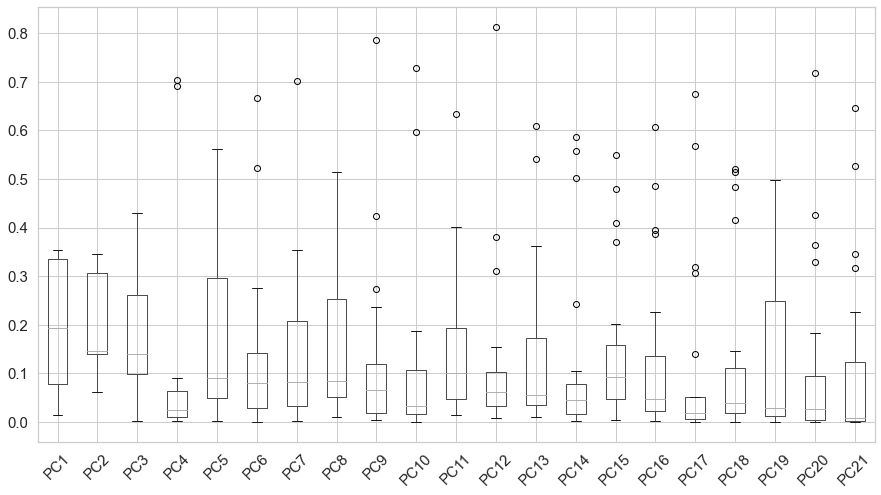

In [267]:
pcsComponents_df.abs().boxplot(rot=45, fontsize=15,figsize=(15,8))

#    Parte 2.  Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?

    Se necesitan al menos 11 componentes para explicar mas del 90% de la varianza del dataset, por ende 11 seria el numero minimo de componetes a utilizar para crear algun modelo. No hay una regla escrita de cuanto % de varianza se debe de explicar para seleccionar el numero de componentes minimo, sin embargo casi siempre se escoge el 90% como regla de dedo.

¿Cuál es la variación de los datos que representan esos componentes?
    
    El 90.84% de varianza es explicada con 11 componentes.

¿Cuál es la pérdida de información después de realizar PCA?

    Al utilizar 11 componentes, se perderia 100 - 90.84 = 9.16% de la información.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

    Los siguientes valores se obtuvieron CONSIDERANDO los valores atipicos (outliers), no hay evidencia suficiente que muestre que estos datos sean tratados como BIAS, por ende decidimos considerarlos.

    El valor original mas relevante para PC1 es:  Bill June, 2005 , con un peso de:  [0.35404466]
    El valor original mas relevante para PC2 es:  Repayment June, 2005 , con un peso de:  [0.34520086]
    El valor original mas relevante para PC3 es:  amount paid  August, 2005 , con un peso de:  [0.42994087]
    El valor original mas relevante para PC4 es:  Education , con un peso de:  [0.70367197]
    El valor original mas relevante para PC5 es:  amount paid  May, 2005 , con un peso de:  [0.56117246]
    El valor original mas relevante para PC6 es:  amount paid  June, 2005 , con un peso de:  [0.6659325]
    El valor original mas relevante para PC7 es:  amount paid  May, 2005 , con un peso de:  [0.70213931]
    El valor original mas relevante para PC8 es:  amount paid  April, 2005 , con un peso de:  [0.51483408]
    El valor original mas relevante para PC9 es:  amount paid  July, 2005 , con un peso de:  [0.78604804]
    El valor original mas relevante para PC10 es:  amount paid  September, 2005 , con un peso de:  [0.72908721]
    El valor original mas relevante para PC11 es:  Repayment September, 2005 , con un peso de:  [0.10160137]
    

    El valor original menos relevante para PC1 es:  Age , con un peso de:  [0.01351372]
    El valor original menos relevante para PC2 es:  Age , con un peso de:  [0.06185642]
    El valor original menos relevante para PC3 es:  Repayment September, 2005 , con un peso de:  [0.00160321]
    El valor original menos relevante para PC4 es:  Bill July, 2005 , con un peso de:  [0.00240161]
    El valor original menos relevante para PC5 es:  Repayment April, 2005 , con un peso de:  [0.00254917]
    El valor original menos relevante para PC6 es:  Repayment August, 2005 , con un peso de:  [0.00018953]
    El valor original menos relevante para PC7 es:  Bill September, 2005 , con un peso de:  [0.00270433]
    El valor original menos relevante para PC8 es:  Repayment July, 2005 , con un peso de:  [0.00988628]
    El valor original menos relevante para PC9 es:  Bill May, 2005 , con un peso de:  [0.00356531]
    El valor original menos relevante para PC10 es:  Education , con un peso de:  [0.00107573]
    El valor original menos relevante para PC11 es:  Bill July, 2005 , con un peso de:  [0.19300396]

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?



Es recomendable cuando buscamos reconstruir las variables de un conjunto de datos en nuevas variables no correlacionadas, con el fin de construir una trasformación para generar un nuevo sistemas de coordenadas para el conjunto original de datos, formando así nuevos ejes de transformaciones lineales de varias variables nuevas.

Entre los beneficios están: 
1. Nos permite reducir la dimensionalidad de un conjunto de datos, haciendo énfasis en aquellas variables más importantes, descartando así aquellas menos relevantes.
2. Para eliminar o reducir el ruido en nusetros modelelos.
3. Nos ayuda a tener mejor presión durante el enrtremiento y pruebas de nuestro modelos.
